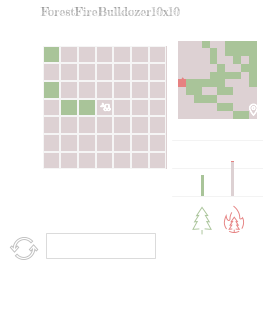

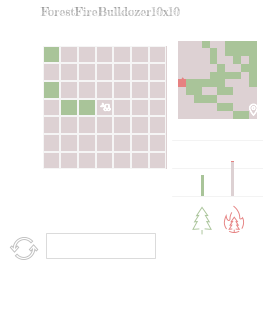

In [1]:
import gym
import gym_cellular_automata as gymca

# benchmark mode
#env_id = gymca.envs[1]
#env = gym.make(env_id)
#env.reset()
#env.render()

# prototype mode
#ProtoEnv = gymca.prototypes[1]
#env = ProtoEnv(nrows=10, ncols=10)
#env.reset()
#env.render()


SQUARE_SHAPE = 10
T_MOVE = 0.025
T_SHOOT = 0.1
T_ANY = 0.025
POS_BULL = [SQUARE_SHAPE-1, SQUARE_SHAPE-1]
BULL_POS = f'{SQUARE_SHAPE-1}.{SQUARE_SHAPE-1}'
POS_FIRE = (5,0)


ProtoEnv = gymca.prototypes[1]
env = ProtoEnv(nrows=SQUARE_SHAPE,
               ncols=SQUARE_SHAPE,
               pos_bull=POS_BULL,
               pos_fire=POS_FIRE,
               t_move=T_MOVE,
               t_shoot=T_SHOOT,
               t_any=T_ANY)

env.reset()
env.render()



In [2]:
env.grid

array([[ 0,  0,  0,  3,  0,  0,  3,  3,  3,  3],
       [ 0,  0,  0,  0,  3,  0,  3,  3,  3,  3],
       [ 0,  0,  0,  0,  3,  0,  0,  3,  0,  3],
       [ 0,  0,  0,  0,  0,  3,  0,  0,  3,  3],
       [ 0,  0,  0,  0,  3,  3,  3,  3,  0,  3],
       [25,  3,  3,  3,  3,  3,  0,  0,  0,  3],
       [ 0,  3,  3,  0,  0,  3,  3,  0,  0,  0],
       [ 0,  0,  3,  3,  3,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  3,  3,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  3,  3,  0]])

In [ ]:
from Solver_Firefighter.reward_wrappers import NumTreesRewardStepOne
import numpy as np

SQUARE_SHAPE = 10
T_MOVE = 0.025
T_SHOOT = 0.1
T_ANY = 0.025
POS_BULL = [SQUARE_SHAPE-1, SQUARE_SHAPE-1]
BULL_POS = f'{SQUARE_SHAPE-1}.{SQUARE_SHAPE-1}'
POS_FIRE = (5,0)


ProtoEnv = gymca.prototypes[1]
env = ProtoEnv(nrows=SQUARE_SHAPE,
               ncols=SQUARE_SHAPE,
               pos_bull=POS_BULL,
               pos_fire=POS_FIRE,
               t_move=T_MOVE,
               t_shoot=T_SHOOT,
               t_any=T_ANY)

env.reset()
env.render()
obs = env.reset()
env = NumTreesRewardStepOne(env)
#env.render()
total_reward = 0.0
done = False
step = 0
threshold = 30

env.render()
print("Total trees: ", np.sum(np.where(env.grid == 3, 1, 0)))
total_loss = 0
#env.observation_space.sample()

while not done:
    action = env.action_space.sample()  # Your agent goes here!
    obs, reward, done, info = env.step([4,1])

    env.render()
    if reward != 0:
        total_loss += reward
        print("reward", reward, "total loss", total_loss)


env.render()
print("Total trees: ", np.sum(np.where(env.grid == 3, 1, 0)))



In [8]:
print(env.action_space.sample())

[0 0]


In [24]:
1 / 0.025

40.0

In [8]:
import numpy as np
class ObservationOneHotWrapper(gym.ObservationWrapper):
    def __init__(self, env):
        super().__init__(env)
        self.observation_space = gym.spaces.Box(shape=(256,256), low=0, high=25)

    def observation(self, obs):
        grid = obs[0]
        #print('obs inside')
        #print(obs)
        #print(obs[1][1])
        return grid


hello


In [5]:
gymca.envs[1]
#gym.make(env_id)

'gym_cellular_automata:ForestFireBulldozer256x256-v3'

In [6]:
from stable_baselines3 import A2C, SAC, PPO, TD3, DQN

from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv

In [10]:
env = gym.make("CartPole-v1")

model = DQN("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=5000, log_interval=4)
model.save("dqn_cartpole")

del model # remove to demonstrate saving and loading

model = DQN.load("dqn_cartpole")

obs = env.reset()
while True:
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    env.render()
    if done:
      obs = env.reset()


Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17       |
|    ep_rew_mean      | 17       |
|    exploration_rate | 0.871    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 6226     |
|    time_elapsed     | 0        |
|    total_timesteps  | 68       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.9     |
|    ep_rew_mean      | 23.9     |
|    exploration_rate | 0.637    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 6532     |
|    time_elapsed     | 0        |
|    total_timesteps  | 191      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.8     |
|    ep_rew_mean      | 22.8  

KeyboardInterrupt: 

In [8]:
env = Monitor(gym.make('Pendulum-v1'))
env = DummyVecEnv([lambda: env])

In [9]:
model = A2C("MlpPolicy", env, verbose=1).learn(int(1000))

Using cuda device
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 200       |
|    ep_rew_mean        | -1.17e+03 |
| time/                 |           |
|    fps                | 235       |
|    iterations         | 100       |
|    time_elapsed       | 2         |
|    total_timesteps    | 500       |
| train/                |           |
|    entropy_loss       | -1.42     |
|    explained_variance | 0.0127    |
|    learning_rate      | 0.0007    |
|    n_updates          | 99        |
|    policy_loss        | -16.4     |
|    std                | 1         |
|    value_loss         | 348       |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 200       |
|    ep_rew_mean        | -1.04e+03 |
| time/                 |           |
|    fps                | 335       |
|    iterations         | 200       |
|    time_elapsed       | 2     

Subespaces
(GridSpace(values=[ 0  3 25], shape=(256, 256)), Tuple(Box([[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]], [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]], (3, 3), float32), MultiDiscrete([256 256]), Box(0.0, inf, (), float32)))
sub_space
Tuple(Box([[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]], [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]], (3, 3), float32), MultiDiscrete([256 256]), Box(0.0, inf, (), float32))
s-dict


AttributeError: 'Tuple' object has no attribute 'Dict'

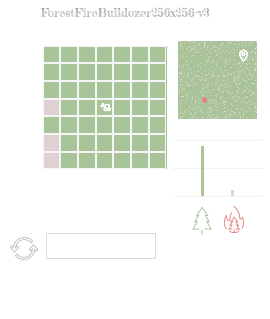

In [7]:
# benchmark mode
env_id = gymca.envs[1]
env = gym.make(env_id)
env = ObservationOneHotWrapper(env)

env.reset()
env.render()
env = Monitor(gym.make(env_id))
env = DummyVecEnv([lambda: env])
model = A2C("MlpPolicy", env, verbose=1).learn(int(1000))


In [14]:
env = gym.make("CartPole-v1")

#env_id = gymca.envs[1]
#env = gym.make(env_id)
#env.reset()
#env.render()


model = DQN("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=5000, log_interval=4)
model.save("dqn_b")

del model # remove to demonstrate saving and loading

model = DQN.load("dqn_b")

obs = env.reset()
while True:
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    #env.render()
    if done:
      obs = env.reset()


Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 26.8     |
|    ep_rew_mean      | 26.8     |
|    exploration_rate | 0.797    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 8206     |
|    time_elapsed     | 0        |
|    total_timesteps  | 107      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 24.2     |
|    ep_rew_mean      | 24.2     |
|    exploration_rate | 0.631    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 8249     |
|    time_elapsed     | 0        |
|    total_timesteps  | 194      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 24.2     |
|    ep_rew_mean      | 24.2  

KeyboardInterrupt: 

NotImplementedError: Nested observation spaces are not supported (Tuple/Dict space inside Tuple/Dict space).

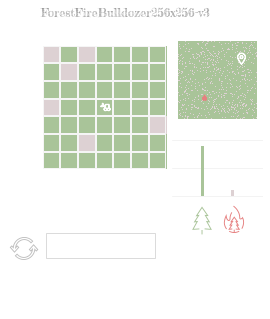

In [19]:
import os
save_dir = "test_models"
os.makedirs(save_dir, exist_ok=True)

env_id = gymca.envs[1]
env = gym.make(env_id)
env.reset()
env.render()

#SAC, PPO, TD3
model = TD3('MlpPolicy', env, verbose=0).learn(8000)
# The model will be saved under PPO_tutorial.zip
model.save(save_dir + "/PPO_tutorial")

# sample an observation from the environment
obs = model.env.observation_space.sample()

# Check prediction before saving
print("pre saved", model.predict(obs, deterministic=True))

del model # delete trained model to demonstrate loading

loaded_model = PPO.load(save_dir + "/PPO_tutorial")
# Check that the prediction is the same after loading (for the same observation)
print("loaded", loaded_model.predict(obs, deterministic=True))


In [6]:
import gym
import gym_cellular_automata as gymca

import numpy as np

from stable_baselines3 import A2C, SAC, PPO, TD3, DQN
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.vec_env import VecFrameStack
from stable_baselines3.common.env_util import make_atari_env
from stable_baselines3.common.utils import set_random_seed

import os


SQUARE_SHAPE = 10
T_MOVE = 0.05
T_SHOOT = 0.05
POS_BULL = None#[SQUARE_SHAPE-1, SQUARE_SHAPE-1]
BULL_POS = None#f'{SQUARE_SHAPE-1}.{SQUARE_SHAPE-1}'

# we stablish t_any = T_move

MODEL = PPO
NAME_MODEL = 'PPO'


dir_name = f"{NAME_MODEL}_{SQUARE_SHAPE}-{T_MOVE}-{T_SHOOT}-{BULL_POS}"
#mcm_time_actions =

class ObservationOneHotWrapper(gym.ObservationWrapper):
    def __init__(self, env, shape):
        super().__init__(env)
        self.shape = shape
        #self.observation_space = gym.spaces.MultiBinary([3, shape, shape])

        self.observation_space = gym.spaces.Dict(
            {"grid": gym.spaces.MultiBinary([3, shape, shape]),
             "time": gym.spaces.Discrete(40)
            }
        )

    def observation(self, obs):
        #print('obs inside')
        #print(obs)
        grid = obs[0]
        row, col = obs[1][1]
        #print('pos:', row, col)
        grid_pos = np.zeros((self.shape, self.shape))
        grid_pos[row, col] = 1
        grid_tree = np.where(grid == 3, 1, 0)
        grid_fire = np.where(grid == 25, 1, 0)

        #Time_Space
        time = obs[1][-1]
        module = int(time // 0.025)
        if module >= 40:
            module = 39
        return {"grid": [grid_tree, grid_fire, grid_pos],
                "time": int(module)}


class NumTreesReward(gym.RewardWrapper):
    #Returns the number of trees at the end of the episode
    def __init__(self, env):
        super().__init__(env)

    def reward(self, rew):
        if self.done:
            #print(self.grid)
            grid_tree = np.where(self.grid == 3, 1, 0)
            unique, counts = np.unique(grid_tree, return_counts=True)
            try:
                return counts[1]
            except IndexError:
                # There are not any tree
                return 0
        return 0


def make_env(env_id, rank, seed=0):
    """
    Utility function for multiprocessed env.

    :param env_id: (str) the environment ID
    :param seed: (int) the inital seed for RNG
    :param rank: (int) index of the subprocess
    """
    def _init():
        #env = gym.make(env_id)
        # Important: use a different seed for each environment

        env = env_id(nrows=SQUARE_SHAPE,
               ncols=SQUARE_SHAPE,
               pos_bull=POS_BULL,
               t_move=T_MOVE,
               t_shoot=T_SHOOT,
               t_any=T_MOVE)
        env = ObservationOneHotWrapper(env, shape=SQUARE_SHAPE)
        env = NumTreesReward(env)

        env.seed(seed + rank)

        return env
    set_random_seed(seed)
    return _init



In [5]:
ProtoEnv = gymca.prototypes[1]
total_procs = 1

env = DummyVecEnv([make_env(ProtoEnv, i+total_procs) for i in range(total_procs)])

#env = make_vec_env(env, n_envs=4)

model = MODEL("MultiInputPolicy", env, verbose=1).learn(int(1000))
#model = PPO('MlpPolicy', 'Pendulum-v1', verbose=0).learn(8000)

# Create save dir
save_dir = "test_models"
os.makedirs(save_dir, exist_ok=True)


model.save(save_dir + f"/{dir_name}")
env.close()


Using cuda device
-----------------------------
| time/              |      |
|    fps             | 432  |
|    iterations      | 1    |
|    time_elapsed    | 4    |
|    total_timesteps | 2048 |
-----------------------------


In [2]:
from stable_baselines3 import PPO
from stable_baselines3.common.envs import SimpleMultiObsEnv


# Stable Baselines provides SimpleMultiObsEnv as an example environment with Dict observations
env = SimpleMultiObsEnv(random_start=False)
env.observation_space.sample()
#model = PPO("MultiInputPolicy", env, verbose=1)
#model.learn(total_timesteps=10)

OrderedDict([('img',
              array([[[186],
                      [245],
                      [ 25],
                      ...,
                      [ 50],
                      [ 98],
                      [173]],
              
                     [[ 77],
                      [ 90],
                      [100],
                      ...,
                      [171],
                      [139],
                      [197]],
              
                     [[119],
                      [164],
                      [179],
                      ...,
                      [194],
                      [ 21],
                      [254]],
              
                     ...,
              
                     [[218],
                      [244],
                      [148],
                      ...,
                      [247],
                      [123],
                      [244]],
              
                     [[203],
                      [ 58],
            

In [29]:
# Load Model and continue training
save_dir = "test_models"

# load the model, and when loading set verbose to 1
#loaded_model = MODEL.load(save_dir + f"/{NAME_MODEL}_{SQUARE_SHAPE}-{T_MOVE}-{T_SHOOT}-{BULL_POS}", verbose=1)
model = MODEL.load(save_dir + f"/{dir_name}", verbose=1)

# show the save hyperparameters
print("loaded:", "gamma =", model.gamma, "n_steps =", model.n_steps)

# as the environment is not serializable, we need to set a new instance of the environment
ProtoEnv = gymca.prototypes[1]
#total_procs = 16

env = DummyVecEnv([make_env(ProtoEnv, i+total_procs) for i in range(total_procs)])


model.set_env(env)
# and continue training
model.learn(5e6)

# Save again
model.save(save_dir + f"/{dir_name}")
env.close()

loaded: gamma = 0.99 n_steps = 2048
------------------------------
| time/              |       |
|    fps             | 5205  |
|    iterations      | 1     |
|    time_elapsed    | 6     |
|    total_timesteps | 32768 |
------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 1850        |
|    iterations           | 2           |
|    time_elapsed         | 35          |
|    total_timesteps      | 65536       |
| train/                  |             |
|    approx_kl            | 0.018981984 |
|    clip_fraction        | 0.209       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.38       |
|    explained_variance   | 0.783       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.603       |
|    n_updates            | 320         |
|    policy_gradient_loss | -0.0245     |
|    value_loss           | 4.4         |
---------------------------------

In [4]:
# Load Model
save_dir = "test_models"

model = MODEL.load(save_dir + dir_name)


In [4]:
SQUARE_SHAPE = 10
T_MOVE = 0.05
T_SHOOT = 0.05
POS_BULL = [SQUARE_SHAPE-1, SQUARE_SHAPE-1]
BULL_POS = f'{SQUARE_SHAPE-1}.{SQUARE_SHAPE-1}'


In [8]:
import imageio

# Play
ESSAYS = 3
train_steps = '7m'

ProtoEnv = gymca.prototypes[1]
env = ProtoEnv(nrows=SQUARE_SHAPE,
               ncols=SQUARE_SHAPE,
               pos_bull=POS_BULL,
               t_move=T_MOVE,
               t_shoot=T_SHOOT,
               t_any=T_MOVE)

env = ObservationOneHotWrapper(env)
env = NumTreesReward(env)
# Load Model
save_dir = "modelos_chingones/"
model = MODEL.load(save_dir + MODEL_NAME, env=env)

for essay in range(ESSAYS):
    total_reward = 0.0
    done = False
    step = 0
    threshold = 15
    env.reset()
    #env.render()

    images = []
    obs = env.reset()
    img = env.render(rgb=True)

    while not done: # and step < threshold:
        #print(step)
        images.append(img)
        action = model.predict(obs, deterministic=True)[0]
        #action = env.action_space.sample()  # Your agent goes here!
        #action = [1,1] if step % 2  else [3,1]
        #print('action', action, type(action))
        obs, reward, done, info = env.step(action)
        #print(reward)
        #print('obs', step)
        #print(obs)
        #print(obs[1][1])
        #print(info)
        total_reward += reward
        #print(reward)
        step += 1
        #env.render()
        img = env.render(rgb=True)

    print('Done', done, step)
    print('Total_reward', total_reward)

    save_dir_gif = f"gifs"
    os.makedirs(save_dir_gif, exist_ok=True)

    gif_name = save_dir_gif + f"/{dir_name}" + f'-{train_steps}' + f"-{str(essay)}"
    imageio.mimsave(f"{gif_name}.gif", images, fps=3)


TypeError: __init__() missing 1 required positional argument: 'shape'

# Tutorial of Callbacks

In [2]:
from stable_baselines3.common.callbacks import BaseCallback


class CustomCallback(BaseCallback):
    """
    A custom callback that derives from ``BaseCallback``.

    :param verbose: Verbosity level: 0 for no output, 1 for info messages, 2 for debug messages
    """
    def __init__(self, verbose=0):
        super(CustomCallback, self).__init__(verbose)
        # Those variables will be accessible in the callback
        # (they are defined in the base class)
        # The RL model
        # self.model = None  # type: BaseAlgorithm
        # An alias for self.model.get_env(), the environment used for training
        # self.training_env = None  # type: Union[gym.Env, VecEnv, None]
        # Number of time the callback was called
        # self.n_calls = 0  # type: int
        # num_timesteps is the number of environments multiplied by the number of time env.step() was called
        # self.num_timesteps = 0  # type: int
        # local and global variables
        # self.locals = None  # type: Dict[str, Any]
        # self.globals = None  # type: Dict[str, Any]
        # The logger object, used to report things in the terminal
        # self.logger = None  # stable_baselines3.common.logger
        # # Sometimes, for event callback, it is useful
        # # to have access to the parent object
        # self.parent = None  # type: Optional[BaseCallback]

    def _on_training_start(self) -> None:
        """
        This method is called before the first rollout starts.
        """
        pass

    def _on_rollout_start(self) -> None:
        """
        A rollout is the collection of environment interaction
        using the current policy.
        This event is triggered before collecting new samples.
        """
        # For off-policy algorithms like SAC, DDPG, TD3 or DQN, the notion of rollout corresponds to the steps taken in the environment between two updates.
        pass

    def _on_step(self) -> bool:
        """
        This method will be called by the model after each call to `env.step()`.

        For child callback (of an `EventCallback`), this will be called
        when the event is triggered.

        :return: (bool) If the callback returns False, training is aborted early.
        """
        return True

    def _on_rollout_end(self) -> None:
        """
        This event is triggered before updating the policy.
        """
        pass

    def _on_training_end(self) -> None:
        """
        This event is triggered before exiting the `learn()` method.
        """
        pass


In [3]:
class EventCallback(BaseCallback):
    """
    Base class for triggering callback on event.

    :param callback: (Optional[BaseCallback]) Callback that will be called
        when an event is triggered.
    :param verbose: Verbosity level: 0 for no output, 1 for info messages, 2 for debug messages
    """
    def __init__(self, callback: Optional[BaseCallback] = None, verbose: int = 0):
        super(EventCallback, self).__init__(verbose=verbose)
        self.callback = callback
        # Give access to the parent
        if callback is not None:
            self.callback.parent = self
    ...

    def _on_event(self) -> bool:
        if self.callback is not None:
            return self.callback()
        return True


NameError: name 'Optional' is not defined

In [4]:
from stable_baselines3 import SAC
from stable_baselines3.common.callbacks import CheckpointCallback

# Save a checkpoint every 1000 steps
checkpoint_callback = CheckpointCallback(
  save_freq=1000,
  save_path="./logs/",
  name_prefix="rl_model",
  save_replay_buffer=True,
  save_vecnormalize=True,
)

model = SAC("MlpPolicy", "Pendulum-v1")
model.learn(2000, callback=checkpoint_callback)


In [5]:
import gym

from stable_baselines3 import SAC
from stable_baselines3.common.callbacks import EvalCallback

# Separate evaluation env
eval_env = gym.make("Pendulum-v1")
# Use deterministic actions for evaluation
eval_callback = EvalCallback(eval_env, best_model_save_path="./logs/",
                             log_path="./logs/", eval_freq=500,
                             deterministic=True, render=False)

model = SAC("MlpPolicy", "Pendulum-v1")
model.learn(5000, callback=eval_callback)


/home/bruno/miniconda3/envs/DRL_9/lib/python3.9/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=500, episode_reward=-1572.03 +/- 146.90
Episode length: 200.00 +/- 0.00
New best mean reward!
Eval num_timesteps=1000, episode_reward=-1692.70 +/- 126.87
Episode length: 200.00 +/- 0.00
Eval num_timesteps=1500, episode_reward=-1409.64 +/- 83.13
Episode length: 200.00 +/- 0.00
New best mean reward!
Eval num_timesteps=2000, episode_reward=-1151.00 +/- 81.34
Episode length: 200.00 +/- 0.00
New best mean reward!
Eval num_timesteps=2500, episode_reward=-1231.77 +/- 75.08
Episode length: 200.00 +/- 0.00
Eval num_timesteps=3000, episode_reward=-260.15 +/- 161.21
Episode length: 200.00 +/- 0.00
New best mean reward!
Eval num_timesteps=3500, episode_reward=-176.87 +/- 60.25
Episode length: 200.00 +/- 0.00
New best mean reward!
Eval num_timesteps=4000, episode_reward=-172.51 +/- 54.63
Episode length: 200.00 +/- 0.00
New best mean reward!
Eval num_timesteps=4500, episode_reward=-222.87 +/- 89.95
Episode length: 200.00 +/- 0.00
Eval num_timesteps=5000, episode_reward=-170.71 +/-

In [8]:
import gym

from stable_baselines3 import SAC
from stable_baselines3.common.callbacks import CallbackList, CheckpointCallback, EvalCallback

checkpoint_callback = CheckpointCallback(save_freq=1000, save_path="./logs/")
# Separate evaluation env
eval_env = gym.make("Pendulum-v1")
eval_callback = EvalCallback(eval_env, best_model_save_path="./logs/best_model",
                             log_path="./logs/results", eval_freq=500)
# Create the callback list
callback = CallbackList([checkpoint_callback, eval_callback])

model = SAC("MlpPolicy", "Pendulum-v1")
# Equivalent to:
# model.learn(5000, callback=[checkpoint_callback, eval_callback])
model.learn(5000, callback=callback)


Eval num_timesteps=500, episode_reward=-1587.58 +/- 231.02
Episode length: 200.00 +/- 0.00
New best mean reward!
Eval num_timesteps=1000, episode_reward=-1603.03 +/- 153.13
Episode length: 200.00 +/- 0.00
Eval num_timesteps=1500, episode_reward=-1498.32 +/- 81.61
Episode length: 200.00 +/- 0.00
New best mean reward!
Eval num_timesteps=2000, episode_reward=-1080.34 +/- 101.66
Episode length: 200.00 +/- 0.00
New best mean reward!
Eval num_timesteps=2500, episode_reward=-568.68 +/- 69.08
Episode length: 200.00 +/- 0.00
New best mean reward!
Eval num_timesteps=3000, episode_reward=-988.92 +/- 188.01
Episode length: 200.00 +/- 0.00
Eval num_timesteps=3500, episode_reward=-370.21 +/- 356.85
Episode length: 200.00 +/- 0.00
New best mean reward!
Eval num_timesteps=4000, episode_reward=-212.55 +/- 134.15
Episode length: 200.00 +/- 0.00
New best mean reward!
Eval num_timesteps=4500, episode_reward=-124.90 +/- 135.63
Episode length: 200.00 +/- 0.00
New best mean reward!
Eval num_timesteps=5000, e

In [9]:
#Stop training in reward threshold
import gym

from stable_baselines3 import SAC
from stable_baselines3.common.callbacks import EvalCallback, StopTrainingOnRewardThreshold

# Separate evaluation env
eval_env = gym.make("Pendulum-v1")
# Stop training when the model reaches the reward threshold
callback_on_best = StopTrainingOnRewardThreshold(reward_threshold=-200, verbose=1)
eval_callback = EvalCallback(eval_env, callback_on_new_best=callback_on_best, verbose=1)

model = SAC("MlpPolicy", "Pendulum-v1", verbose=1)
# Almost infinite number of timesteps, but the training will stop
# early as soon as the reward threshold is reached
model.learn(int(1e10), callback=eval_callback)


Using cuda device
Creating environment from the given name 'Pendulum-v1'
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.23e+03 |
| time/              |           |
|    episodes        | 4         |
|    fps             | 133       |
|    time_elapsed    | 5         |
|    total_timesteps | 800       |
| train/             |           |
|    actor_loss      | 18.9      |
|    critic_loss     | 0.231     |
|    ent_coef        | 0.812     |
|    ent_coef_loss   | -0.331    |
|    learning_rate   | 0.0003    |
|    n_updates       | 699       |
----------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -1.4e+03 |
| time/              |          |
|    episodes        | 8        |
|    fps             | 131      |
|    time_elapsed

In [10]:
import gym

from stable_baselines3 import PPO
from stable_baselines3.common.callbacks import CheckpointCallback, EveryNTimesteps

# this is equivalent to defining CheckpointCallback(save_freq=500)
# checkpoint_callback will be triggered every 500 steps
checkpoint_on_event = CheckpointCallback(save_freq=1, save_path="./logs/")
event_callback = EveryNTimesteps(n_steps=500, callback=checkpoint_on_event)

model = PPO("MlpPolicy", "Pendulum-v1", verbose=1)

model.learn(int(2e4), callback=event_callback)


Using cuda device
Creating environment from the given name 'Pendulum-v1'
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.23e+03 |
| time/              |           |
|    fps             | 976       |
|    iterations      | 1         |
|    time_elapsed    | 2         |
|    total_timesteps | 2048      |
----------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 200          |
|    ep_rew_mean          | -1.23e+03    |
| time/                   |              |
|    fps                  | 812          |
|    iterations           | 2            |
|    time_elapsed         | 5            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0021034377 |
|    clip_fraction        |

In [11]:
from stable_baselines3 import A2C
from stable_baselines3.common.callbacks import StopTrainingOnMaxEpisodes

# Stops training when the model reaches the maximum number of episodes
callback_max_episodes = StopTrainingOnMaxEpisodes(max_episodes=5, verbose=1)

model = A2C("MlpPolicy", "Pendulum-v1", verbose=1)
# Almost infinite number of timesteps, but the training will stop
# early as soon as the max number of episodes is reached
model.learn(int(1e10), callback=callback_max_episodes)


Using cuda device
Creating environment from the given name 'Pendulum-v1'
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 200       |
|    ep_rew_mean        | -1.27e+03 |
| time/                 |           |
|    fps                | 413       |
|    iterations         | 100       |
|    time_elapsed       | 1         |
|    total_timesteps    | 500       |
| train/                |           |
|    entropy_loss       | -1.45     |
|    explained_variance | 0.0651    |
|    learning_rate      | 0.0007    |
|    n_updates          | 99        |
|    policy_loss        | -50.4     |
|    std                | 1.03      |
|    value_loss         | 1.23e+03  |
-------------------------------------
Stopping training with a total of 1000 steps because the A2C model reached max_episodes=5, by playing for 5 episodes 


In [12]:
import gym

from stable_baselines3 import SAC
from stable_baselines3.common.callbacks import EvalCallback, StopTrainingOnNoModelImprovement

# Separate evaluation env
eval_env = gym.make("Pendulum-v1")
# Stop training if there is no improvement after more than 3 evaluations
stop_train_callback = StopTrainingOnNoModelImprovement(max_no_improvement_evals=3, min_evals=5, verbose=1)
eval_callback = EvalCallback(eval_env, eval_freq=1000, callback_after_eval=stop_train_callback, verbose=1)

model = SAC("MlpPolicy", "Pendulum-v1", learning_rate=1e-3, verbose=1)
# Almost infinite number of timesteps, but the training will stop early
# as soon as the number of consecutive evaluations without model
# improvement is greater than 3
model.learn(int(1e10), callback=eval_callback)


Using cuda device
Creating environment from the given name 'Pendulum-v1'
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -1.6e+03 |
| time/              |          |
|    episodes        | 4        |
|    fps             | 122      |
|    time_elapsed    | 6        |
|    total_timesteps | 800      |
| train/             |          |
|    actor_loss      | 28.5     |
|    critic_loss     | 0.0484   |
|    ent_coef        | 0.503    |
|    ent_coef_loss   | -1.06    |
|    learning_rate   | 0.001    |
|    n_updates       | 699      |
---------------------------------
Eval num_timesteps=1000, episode_reward=-1732.38 +/- 46.84
Episode length: 200.00 +/- 0.00
----------------------------------
| eval/              |           |
|    mean_ep_length  | 200       |
|    mean_reward     | -1.73e+03 |
| time/              |           |
|    t

In [2]:
import gym
import wandb
from wandb.integration.sb3 import WandbCallback

from stable_baselines3 import PPO

config = {
    "policy_type": "MlpPolicy",
    "total_timesteps": 25000,
    "env_id": "CartPole-v1",
}
run = wandb.init(
    project="sb3",
    config=config,
    sync_tensorboard=True,  # auto-upload sb3's tensorboard metrics
    # monitor_gym=True,  # auto-upload the videos of agents playing the game
    # save_code=True,  # optional
)

model = PPO(config["policy_type"], config["env_id"], verbose=1, tensorboard_log=f"runs/{run.id}")
model.learn(
    total_timesteps=config["total_timesteps"],
    callback=WandbCallback(
        model_save_path=f"models/{run.id}",
        verbose=2,
    ),
)
run.finish()

Using cuda device
Creating environment from the given name 'CartPole-v1'
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to runs/7bzczhxp/PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23       |
|    ep_rew_mean     | 23       |
| time/              |          |
|    fps             | 1046     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 29.6        |
|    ep_rew_mean          | 29.6        |
| time/                   |             |
|    fps                  | 852         |
|    iterations           | 2           |
|    time_elapsed         | 4           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.009045091 |
|    clip_fractio

global_step,▁▂▂▃▃▄▅▅▆▆▇▇█
rollout/ep_len_mean,▁▁▁▂▂▃▄▄▅▆▆▇█
rollout/ep_rew_mean,▁▁▁▂▂▃▄▄▅▆▆▇█
time/fps,█▄▃▂▂▂▂▁▁▁▁▁▁
train/approx_kl,▅▆▇█▄█▄▃▆▃▅▁
train/clip_fraction,▅▄█▅▃▇▃▃▅▅▆▁
train/clip_range,▁▁▁▁▁▁▁▁▁▁▁▁
train/entropy_loss,▁▂▃▅▆▆▇▆▇▇▇█
train/explained_variance,▁▁▃▃▃▆▆█▇██▆
train/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁
train/loss,▂▄▅▆█▃▃▁█▁▁▆


In [1]:
import wandb
import random

# start a new wandb run to track this script
wandb.init(
    # set the wandb project where this run will be logged
    project="my-awesome-project",

    # track hyperparameters and run metadata
    config={
    "learning_rate": 0.02,
    "architecture": "CNN",
    "dataset": "CIFAR-100",
    "epochs": 10,
    }
)

# simulate training
epochs = 10
offset = random.random() / 5
for epoch in range(2, epochs):
    acc = 1 - 2 ** -epoch - random.random() / epoch - offset
    loss = 2 ** -epoch + random.random() / epoch + offset

    # log metrics to wandb
    wandb.log({"acc": acc, "loss": loss})

# [optional] finish the wandb run, necessary in notebooks
wandb.finish()

wandb: Currently logged in as: brunogupa. Use `wandb login --relogin` to force relogin


acc,▁▃▇█▆▇██
loss,█▃▄▁▃▂▁▁
acc,0.79167
loss,0.1838
